In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from numpy.testing import assert_almost_equal

# Global constants
m = 1
A = 1
C_d = 1

In [3]:
def force_gravity(m, x, y):
    '''Calculate the force of gravity on an object.
    
    Parameters:
    
    m : mass of object [kg]
    y : distance above surface of earth [m]
    
    returns:
    
    F_g : force due to gravity [N]'''
    
    G = 6.6742*10**-11 # gravitational constant, Nm^2/kg^2
    M = 5.9722*10**24 # mass of earth, kg
    R = 6371*10**3 # radius of earth, m
    
    F_g = G*M*m/(x**2 + (y)**2)
    return F_g

def print_init(init):
    print('INITIAL CONDITIONS')
    print('x =', init[0])
    print('y =', init[1])
    print('vx =', init[2])
    print('vy =', init[3])

INITIAL CONDITIONS
x = 0.0
y = 6371000.0
vx = 7909.75401054
vy = 0.0


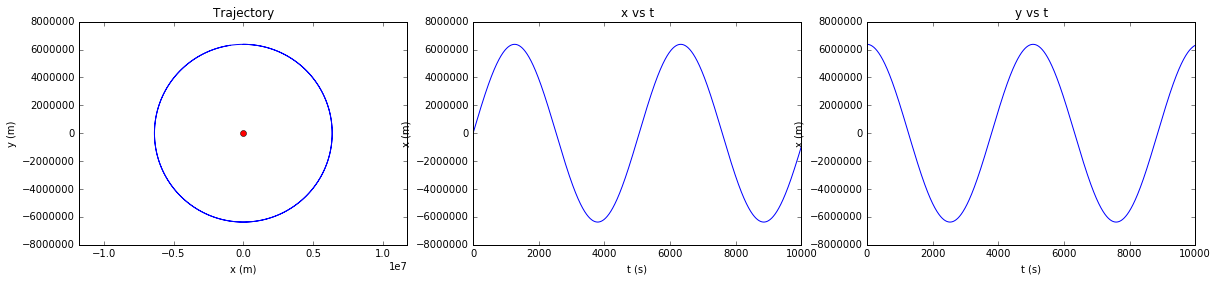

In [21]:
def x_acceleration1(x, y):
    theta = np.arctan2(y,x)
    F_g = -force_gravity(m, x, y)/m
    F = F_g * np.cos(theta)
    return F

def y_acceleration1(x, y):
    cos_theta = y/(x**2 + y**2)**(1/2)
    F_g = -force_gravity(m, x, y)/m
    return F_g * cos_theta

def F1(init, T):
    x, y = init[0], init[1]
    vx, vy = init[2], init[3]
    ax, ay = x_acceleration1(x, y), y_acceleration1(x, y)
    
    return np.array([vx, vy, ax, ay])

def test_F1(init, t_max, N):
    T = np.linspace(0, t_max, N)
    
    data = odeint(F1, init, T)
    x, y, vx, vy = data[:,0], data[:, 1], data[:,2], data[:,3]
    
    plt.figure(figsize=(20,4))
    
    plt.subplot(1,3,1)
    plt.plot(x, y)
    plt.title('Trajectory')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.plot(0, 0, 'ro')

    plt.subplot(1,3,2)
    plt.plot(T, x)
    plt.title('x vs t')
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')

    plt.subplot(1,3,3)
    plt.plot(T, y)
    plt.title('y vs t')
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')
    plt.show()
    
def plot_test_F1():
    G = 6.6742*10**-11 # gravitational constant, Nm^2/kg^2
    M = 5.9722*10**24 # mass of earth, kg
    R = 6371*10**3 # radius of earth, m
    
    y = R
    v0 = np.sqrt(G*M)/(0 + (y)**2)**(1/4)
    
    init1 = np.array([0, y, v0, 0])

    print_init(init1)
    test_F1(init1, 10000, 10000)

    #print_init(init2)
    #test_F1(init2, t_ground2*1.15, 100000)

    #print_init(init3)
    #test_F1(init3, t_ground3*1.15, 100000)

    #print_init(init4)
    #test_F1(init4, t_ground4*1.15, 100000)
    
plot_test_F1()